<h1>Tabular Playground Series - Aug 2022</h1>

In [67]:
import pandas as pd

train_path = "train.csv"
train_df = pd.read_csv(train_path)
train_df.head(10)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
5,5,A,75.35,material_7,material_8,9,5,11,4,0,...,10.622,14.904,19.107,13.327,15.354,19.251,NaN,17.625,832.902,0
6,6,A,161.71,material_7,material_8,9,5,12,2,4,...,11.370,17.714,19.924,11.560,16.653,17.734,NaN,16.637,684.438,1
7,7,A,177.92,material_7,material_8,9,5,4,8,8,...,10.254,16.449,20.478,12.207,15.624,16.968,15.176,17.231,684.000,1
8,8,A,109.50,material_7,material_8,9,5,9,6,5,...,11.557,15.965,19.604,14.091,15.674,13.327,13.535,15.408,NaN,0
9,9,A,98.72,material_7,material_8,9,5,10,4,7,...,10.384,15.237,18.427,12.635,14.318,14.327,12.867,NaN,NaN,0


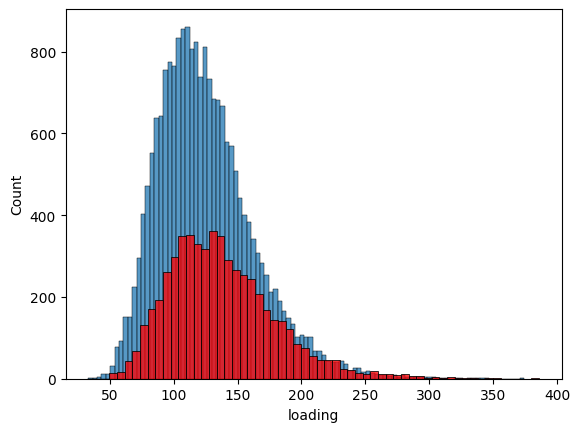

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

measurements = []
for word in train_df.columns:
    if "measure" in word:
        measurements.append(word)

# train_df['loading'].hist(bins=100)
sns.histplot(train_df.loc[train_df['failure'] == 0, 'loading'])
sns.histplot(train_df.loc[train_df['failure'] == 1, 'loading'], color='red')
plt.show()

In [71]:
# train_df['loading'] = train_df.loc[train_df['failure'] == 0, 'loading'].fillna(train_df.loc[train_df['failure'] == 0, 'loading'].median())
# train_df['loading'] = train_df.loc[train_df['failure'] == 1, 'loading'].fillna(train_df.loc[train_df['failure'] == 1, 'loading'].median())
mask1 = (train_df['failure'] == 0)
mask2 = (train_df['failure'] == 1)
train_df.loc[mask1, 'loading'] = train_df.loc[mask1, 'loading'].fillna(train_df.loc[mask1, 'loading'].median())
train_df.loc[mask2, 'loading'] = train_df.loc[mask2, 'loading'].fillna(train_df.loc[mask2, 'loading'].median())

In [72]:
train_df.isnull().sum()

id                   0
product_code         0
loading              0
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64